# Train a model for time-integration

This notebook shows an example of training a simple model (and model evaluation) for time-integration with Burgers' equation.

We trained many more models in our paper, but hopefully this gives an idea of what this is like.

### Copyright 2019 Google LLC

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

## Setup environment

In [0]:
! pip install -q -U xarray matplotlib
! rm -rf data-driven-discretization-1d
! git clone https://github.com/google/data-driven-discretization-1d.git
! pip install -q -e data-driven-discretization-1d
# install the seaborn bug-fix from https://github.com/mwaskom/seaborn/pull/1602
! pip install -U -q git+git://github.com/stfnrpplngr/seaborn.git@309a9de383fac4db1c66dbf87815c4ba0c439c59


     |████████████████████████████████| 634kB 3.3MB/s 
Cloning into 'data-driven-discretization-1d'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 342 (delta 0), reused 2 (delta 0), pack-reused 338
Receiving objects: 100% (342/342), 147.61 KiB | 2.95 MiB/s, done.
Resolving deltas: 100% (248/248), done.
     |████████████████████████████████| 3.0MB 3.3MB/s 
     |████████████████████████████████| 235kB 58.5MB/s 
     |████████████████████████████████| 51kB 9.2MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 
     |████████████████████████████████| 81kB 12.3MB/s 
     |████████████████████████████████| 153kB 60.9MB/s 
     |████████████████████████████████| 1.2MB 54.2MB/s 
     |████████████████████████████████| 112kB 40.4MB/s 
ERROR: pydrive 1.3.1 has requirement oauth2client>=4.0.0, but you'll have oauth2client 3.0.0 which is incompatible.
ERROR: multiprocess 0.70.9 has requirem

In [0]:
# Ensure we're using Tensorflow 1.x in Colab. If not using Colab, remove this magic.
%tensorflow_version 1.x
import tensorflow as tf
assert tf.__version__[:2] == '1.'

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.







## Run training

To help ensure this example runs quickly, we train for only 100000 steps, even though in our paper we used 40000 steps.

In [0]:
! gsutil cp gs://data-driven-discretization-public/training-data/burgers.h5 .

Copying gs://data-driven-discretization-public/training-data/burgers.h5...
/ [1 files][ 39.1 MiB/ 39.1 MiB]                                                
Operation completed over 1 objects/39.1 MiB.                                     


In [0]:
%%time
! python data-driven-discretization-1d/pde_superresolution/scripts/run_training.py \
--checkpoint_dir burgers-checkpoints \
--equation burgers \
--hparams resample_factor=16,learning_stops=[5000,10000] \
--input_path burgers.h5

/usr/local/lib/python3.6/dist-packages/absl/flags/_validators.py:359: UserWarning: Flag --checkpoint_dir has a non-None default value; therefore, mark_flag_as_required will pass even if flag is not specified in the command line!
  'command line!' % flag_name)
I1203 23:45:04.894261 140321653876608 run_training.py:61] Loading training data


W1203 23:45:04.896073 140321653876608 module_wrapper.py:139] From /content/data-driven-discretization-1d/pde_superresolution/utils.py:47: The name tf.gfile.Copy is deprecated. Please use tf.io.gfile.copy instead.

I1203 23:45:04.977255 140321653876608 run_training.py:66] Inputs have shape (10000, 512)


W1203 23:45:04.980407 140321653876608 module_wrapper.py:139] From /content/data-driven-discretization-1d/pde_superresolution/scripts/run_training.py:69: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.

I1203 23:45:04.982903 140321653876608 run_training.py:75] Starting training loop


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


W1203 23:45:10.928888 140321653876608 deprecation.py:323] From /content/data-driven-discretization-1d/pde_superresolution/duckarray.py:94: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use `tf.data.Dataset.unbatch()`.


W1203 23:45:11.609592 140321653876608 deprecation.py:323] From /content/data-driven-discretization-1d/pde_superresolution/model.py:396: unbatch (from tensorflow.python.data.experimental.ops.batching) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.unbatch()`.


Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


W1203 23:45:11.634932 140321653876608 deprecation.py:323] From /content/data-driven-discretization-1d/pde_superresolution/training.py:349: DatasetV1.make_one_shot_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


W1203 23:45:11.951882 140321653876608 module_wrapper.py:139] From /content/data-driven-discretization-1d/pde_superresolution/training.py:353: The name tf.local_variables_initializer is deprecated. Please use tf.compat.v1.local_variables_initializer instead.

I1203 23:45:42.533940 140321653876608 training.py:414] baseline_error: [[  0.60345622   8.21094341   0.85900945]
 [288.06875612  93.86809145 224.03838766]]
I1203 23:45:42.536137 140321653876608 training.py:588] Training with hyperparameters:
HParams([('absolute_error_weight', 1.0), ('base_batch_size', 128), ('coefficient_grid_min_size', 6), ('conservative', True), ('ensure_unbiased_coefficients', False), ('equation', 'burgers'), ('equation_kwargs', '{"k_min": 3, "num_points": 512, "eta": 0.01, "k_max": 6}'), ('error_floor', [0.00039408463635481894, 0.00448509119451046, 0.00017447709251428028]), ('error_floor_quantile', 0.1), ('error_max', 0.0), ('error_scale', [1.6571210525761082, 0.12178868499243486, 1.1641315429048973, 0.00347139

W1203 23:45:42.540976 140321653876608 module_wrapper.py:139] From /content/data-driven-discretization-1d/pde_superresolution/training.py:591: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

I1203 23:45:42.545437 140321653876608 training.py:594] Setting up training


Instructions for updating:
Use `tf.data.experimental.shuffle_and_repeat(...)`.


W1203 23:45:43.009394 140321653876608 deprecation.py:323] From /content/data-driven-discretization-1d/pde_superresolution/model.py:403: shuffle_and_repeat (from tensorflow.contrib.data.python.ops.shuffle_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.experimental.shuffle_and_repeat(...)`.


Instructions for updating:
Use `tf.data.Dataset.shuffle(buffer_size, seed)` followed by `tf.data.Dataset.repeat(count)`. Static tf.data optimizations will take care of using the fused implementation.


W1203 23:45:43.011180 140321653876608 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/contrib/data/python/ops/shuffle_ops.py:54: shuffle_and_repeat (from tensorflow.python.data.experimental.ops.shuffle_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.shuffle(buffer_size, seed)` followed by `tf.data.Dataset.repeat(count)`. Static tf.data optimizations will take care of using the fused implementation.


W1203 23:45:43.168518 140321653876608 module_wrapper.py:139] From /content/data-driven-discretization-1d/pde_superresolution/model.py:442: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.



Instructions for updating:
Use `tf.keras.layers.Conv1D` instead.


W1203 23:45:43.184805 140321653876608 deprecation.py:323] From /content/data-driven-discretization-1d/pde_superresolution/layers.py:135: conv1d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv1D` instead.


Instructions for updating:
Please use `layer.__call__` method instead.


W1203 23:45:43.194310 140321653876608 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/layers/convolutional.py:218: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
ksizes is deprecated, use sizes instead


W1203 23:45:43.324556 140321653876608 deprecation.py:506] From /content/data-driven-discretization-1d/pde_superresolution/model.py:532: calling extract_image_patches (from tensorflow.python.ops.array_ops) with ksizes is deprecated and will be removed in a future version.
Instructions for updating:
ksizes is deprecated, use sizes instead


W1203 23:45:43.382651 140321653876608 module_wrapper.py:139] From /content/data-driven-discretization-1d/pde_superresolution/training.py:203: The name tf.train.get_or_create_global_step is deprecated. Please use tf.compat.v1.train.get_or_create_global_step instead.



W1203 23:45:43.389847 140321653876608 module_wrapper.py:139] From /content/data-driven-discretization-1d/pde_superresolution/training.py:206: The name tf.train.piecewise_constant is deprecated. Please use tf.compat.v1.train.piecewise_constant instead.



W1203 23:45:43.420139 140321653876608 module_wrapper.py:139] From /content/data-driven-discretization-1d/pde_superresolution/training.py:212: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.



W1203 23:45:43.421527 140321653876608 module_wrapper.py:139] From /content/data-driven-discretization-1d/pde_superresolution/training.py:214: The name tf.get_collection is deprecated. Please use tf.compat.v1.get_collection instead.



W1203 23:45:43.423277 140321653876608 module_wrapper.py:139] From /content/data-driven-discretization-1d/pde_superresolution/training.py:214: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.



Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.


W1203 23:45:44.292121 140321653876608 deprecation.py:323] From /content/data-driven-discretization-1d/pde_superresolution/training.py:274: DatasetV1.make_initializable_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.


W1203 23:45:44.619048 140321653876608 module_wrapper.py:139] From /content/data-driven-discretization-1d/pde_superresolution/training.py:290: The name tf.metrics.mean is deprecated. Please use tf.compat.v1.metrics.mean instead.



W1203 23:45:45.375782 140321653876608 module_wrapper.py:139] From /content/data-driven-discretization-1d/pde_superresolution/training.py:601: The name tf.trainable_variables is deprecated. Please use tf.compat.v1.trainable_variables instead.

I1203 23:45:45.379871 140321653876608 training.py:601] Variables: <tf.Variable 'predict_coefficients/conv1d/kernel:0' shape=(5, 1, 32) dtype=float32_ref>
<tf.Variable 'predict_coefficients/conv1d/bias:0' shape=(32,) dtype=float32_ref>
<tf.Variable 'predict_coefficients/conv1d_1/kernel:0' shape=(5, 32, 32) dtype=float32_ref>
<tf.Variable 'predict_coefficients/conv1d_1/bias:0' shape=(32,) dtype=float32_ref>
<tf.Variable 'predict_coefficients/conv1d_2/kernel:0' shape=(5, 32, 9) dtype=float32_ref>
<tf.Variable 'predict_coefficients/conv1d_2/bias:0' shape=(9,) dtype=float32_ref>


W1203 23:45:45.383056 140321653876608 module_wrapper.py:139] From /content/data-driven-discretization-1d/pde_superresolution/training.py:606: The name tf.train.MonitoredTrainingSession is deprecated. Please use tf.compat.v1.train.MonitoredTrainingSession instead.



INFO:tensorflow:Create CheckpointSaverHook.


I1203 23:45:45.386346 140321653876608 basic_session_run_hooks.py:541] Create CheckpointSaverHook.


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


W1203 23:45:46.124861 140321653876608 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/training/training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


W1203 23:45:46.140482 140321653876608 module_wrapper.py:139] From /content/data-driven-discretization-1d/pde_superresolution/training.py:517: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.



INFO:tensorflow:Graph was finalized.


I1203 23:45:46.291293 140321653876608 monitored_session.py:240] Graph was finalized.


INFO:tensorflow:Running local_init_op.


I1203 23:45:46.435282 140321653876608 session_manager.py:500] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I1203 23:45:46.465731 140321653876608 session_manager.py:502] Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into burgers-checkpoints/model.ckpt.


I1203 23:45:55.916505 140321653876608 basic_session_run_hooks.py:606] Saving checkpoints for 0 into burgers-checkpoints/model.ckpt.


W1203 23:46:05.249061 140321653876608 basic_session_run_hooks.py:724] It seems that global step (tf.train.get_global_step) has not been increased. Current value (could be stable): 0 vs previous value: 0. You could increase the global step by passing tf.train.get_global_step() to Optimizer.apply_gradients or Optimizer.minimize.


INFO:tensorflow:global_step/sec: 3.19493


I1203 23:46:29.933029 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 3.19493


INFO:tensorflow:global_step/sec: 40.8766


I1203 23:46:32.379339 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 40.8766


W1203 23:46:35.032467 140321653876608 basic_session_run_hooks.py:724] It seems that global step (tf.train.get_global_step) has not been increased. Current value (could be stable): 250 vs previous value: 250. You could increase the global step by passing tf.train.get_global_step() to Optimizer.apply_gradients or Optimizer.minimize.


W1203 23:46:36.175446 140321653876608 basic_session_run_hooks.py:724] It seems that global step (tf.train.get_global_step) has not been increased. Current value (could be stable): 250 vs previous value: 250. You could increase the global step by passing tf.train.get_global_step() to Optimizer.apply_gradients or Optimizer.minimize.


W1203 23:46:37.204634 140321653876608 basic_session_run_hooks.py:724] It seems that global step (tf.train.get_global_step) has not been increased. Current value (could be stable): 250 vs previous value: 250. You could increase the global step by passing tf.train.get_global_step() to Optimizer.apply_gradients or Optimizer.minimize.


W1203 23:46:38.361568 140321653876608 basic_session_run_hooks.py:724] It seems that global step (tf.train.get_global_step) has not been increased. Current value (could be stable): 250 vs previous value: 250. You could increase the global step by passing tf.train.get_global_step() to Optimizer.apply_gradients or Optimizer.minimize.
I1203 23:46:40.147816 140321653876608 training.py:632] loss: 0.0142702, abs_error: u=1.0185/u_t=0.2112/u_x=3.8437, rel_error: u=0.9945/u_t=0.3596/u_x=3.5060, below_baseline: u=0.4917/u_t=0.7405/u_x=0.1433


W1203 23:46:40.149385 140321653876608 module_wrapper.py:139] From /content/data-driven-discretization-1d/pde_superresolution/training.py:531: The name tf.Summary is deprecated. Please use tf.compat.v1.Summary instead.



INFO:tensorflow:global_step/sec: 11.0273


I1203 23:46:41.447734 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 11.0273


INFO:tensorflow:global_step/sec: 39.7021


I1203 23:46:43.966491 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 39.7021


INFO:tensorflow:global_step/sec: 38.4677


I1203 23:46:46.566096 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 38.4677
I1203 23:46:52.005413 140321653876608 training.py:632] loss: 0.0076599, abs_error: u=1.0361/u_t=0.1461/u_x=3.4906, rel_error: u=1.0151/u_t=0.2444/u_x=2.1905, below_baseline: u=0.4752/u_t=0.8190/u_x=0.2506


INFO:tensorflow:global_step/sec: 12.6144


I1203 23:46:54.493491 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.6144


INFO:tensorflow:global_step/sec: 39.3646


I1203 23:46:57.033842 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 39.3646
I1203 23:47:03.815283 140321653876608 training.py:632] loss: 0.0059022, abs_error: u=1.0367/u_t=0.1225/u_x=3.3475, rel_error: u=1.0107/u_t=0.2018/u_x=1.9500, below_baseline: u=0.4742/u_t=0.8525/u_x=0.2860


INFO:tensorflow:global_step/sec: 12.4498


I1203 23:47:05.066109 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.4498


INFO:tensorflow:global_step/sec: 39.8742


I1203 23:47:07.574066 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 39.8742


INFO:tensorflow:global_step/sec: 38.6909


I1203 23:47:10.158584 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 38.6909
I1203 23:47:15.729634 140321653876608 training.py:632] loss: 0.0055453, abs_error: u=1.0570/u_t=0.1183/u_x=3.2657, rel_error: u=1.0308/u_t=0.1951/u_x=1.8591, below_baseline: u=0.4569/u_t=0.8612/u_x=0.2990


INFO:tensorflow:global_step/sec: 12.3743


I1203 23:47:18.239926 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.3743


INFO:tensorflow:global_step/sec: 41.3142


I1203 23:47:20.660337 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 41.3142
I1203 23:47:27.327455 140321653876608 training.py:632] loss: 0.0047293, abs_error: u=1.0453/u_t=0.1053/u_x=3.2233, rel_error: u=1.0230/u_t=0.1707/u_x=1.8763, below_baseline: u=0.4592/u_t=0.8758/u_x=0.2994


INFO:tensorflow:global_step/sec: 12.6527


I1203 23:47:28.563783 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.6527


INFO:tensorflow:global_step/sec: 41.634


I1203 23:47:30.965684 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 41.634


INFO:tensorflow:global_step/sec: 41.4526


I1203 23:47:33.378105 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 41.4526
I1203 23:47:38.792744 140321653876608 training.py:632] loss: 0.0039173, abs_error: u=1.0535/u_t=0.0941/u_x=3.2035, rel_error: u=1.0341/u_t=0.1544/u_x=1.9450, below_baseline: u=0.4493/u_t=0.8872/u_x=0.2909


INFO:tensorflow:global_step/sec: 12.7325


I1203 23:47:41.231976 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.7325


INFO:tensorflow:global_step/sec: 41.8383


I1203 23:47:43.622123 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 41.8383
I1203 23:47:50.515396 140321653876608 training.py:632] loss: 0.0035711, abs_error: u=1.0553/u_t=0.0888/u_x=3.1837, rel_error: u=1.0358/u_t=0.1457/u_x=1.9875, below_baseline: u=0.4392/u_t=0.8942/u_x=0.2795


INFO:tensorflow:global_step/sec: 12.2583


I1203 23:47:51.779829 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.2583


INFO:tensorflow:global_step/sec: 41.7737


I1203 23:47:54.173666 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 41.7737


INFO:tensorflow:global_step/sec: 41.4287


I1203 23:47:56.587476 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 41.4287
I1203 23:48:01.936426 140321653876608 training.py:632] loss: 0.0038178, abs_error: u=1.0469/u_t=0.0944/u_x=3.1613, rel_error: u=1.0282/u_t=0.1519/u_x=1.9898, below_baseline: u=0.4486/u_t=0.8896/u_x=0.2742


INFO:tensorflow:global_step/sec: 12.8642


I1203 23:48:04.360953 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.8642


INFO:tensorflow:global_step/sec: 41.8907


I1203 23:48:06.748126 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 41.8907
I1203 23:48:13.589339 140321653876608 training.py:632] loss: 0.0039418, abs_error: u=1.0526/u_t=0.0942/u_x=3.1593, rel_error: u=1.0318/u_t=0.1468/u_x=2.0136, below_baseline: u=0.4350/u_t=0.8923/u_x=0.2680


INFO:tensorflow:global_step/sec: 12.4428


I1203 23:48:14.784904 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.4428


INFO:tensorflow:global_step/sec: 42.0237


I1203 23:48:17.164601 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 42.0237


INFO:tensorflow:global_step/sec: 40.8829


I1203 23:48:19.610525 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 40.8829
I1203 23:48:25.281014 140321653876608 training.py:632] loss: 0.0031872, abs_error: u=1.0535/u_t=0.0823/u_x=3.1649, rel_error: u=1.0329/u_t=0.1321/u_x=2.0519, below_baseline: u=0.4353/u_t=0.9032/u_x=0.2624


INFO:tensorflow:global_step/sec: 12.2261


I1203 23:48:27.789866 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.2261


INFO:tensorflow:global_step/sec: 41.6686


I1203 23:48:30.189627 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 41.6686
I1203 23:48:36.200243 140321653876608 training.py:632] loss: 0.0030274, abs_error: u=1.0554/u_t=0.0812/u_x=3.1619, rel_error: u=1.0370/u_t=0.1303/u_x=2.0619, below_baseline: u=0.4345/u_t=0.9062/u_x=0.2602


INFO:tensorflow:global_step/sec: 13.8086


I1203 23:48:37.431529 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 13.8086


INFO:tensorflow:global_step/sec: 41.195


I1203 23:48:39.859009 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 41.195


INFO:tensorflow:global_step/sec: 40.5268


I1203 23:48:42.326590 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 40.5268
I1203 23:48:47.810109 140321653876608 training.py:632] loss: 0.0031377, abs_error: u=1.0515/u_t=0.0842/u_x=3.1511, rel_error: u=1.0332/u_t=0.1337/u_x=2.0572, below_baseline: u=0.4369/u_t=0.9045/u_x=0.2617


INFO:tensorflow:global_step/sec: 12.7082


I1203 23:48:50.195475 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.7082


INFO:tensorflow:global_step/sec: 41.7313


I1203 23:48:52.591759 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 41.7313
I1203 23:48:59.189972 140321653876608 training.py:632] loss: 0.0027610, abs_error: u=1.0555/u_t=0.0750/u_x=3.1584, rel_error: u=1.0349/u_t=0.1202/u_x=2.0703, below_baseline: u=0.4336/u_t=0.9127/u_x=0.2607


INFO:tensorflow:global_step/sec: 12.8016


I1203 23:49:00.403244 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.8016


INFO:tensorflow:global_step/sec: 41.6994


I1203 23:49:02.801399 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 41.6994


INFO:tensorflow:global_step/sec: 41.0802


I1203 23:49:05.235616 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 41.0802
I1203 23:49:10.342381 140321653876608 training.py:632] loss: 0.0029251, abs_error: u=1.0477/u_t=0.0787/u_x=3.1472, rel_error: u=1.0275/u_t=0.1236/u_x=2.0619, below_baseline: u=0.4389/u_t=0.9108/u_x=0.2617


INFO:tensorflow:global_step/sec: 13.2763


I1203 23:49:12.767831 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 13.2763


INFO:tensorflow:global_step/sec: 42.1048


I1203 23:49:15.142872 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 42.1048
I1203 23:49:21.888789 140321653876608 training.py:632] loss: 0.0025965, abs_error: u=1.0529/u_t=0.0717/u_x=3.1472, rel_error: u=1.0300/u_t=0.1145/u_x=2.0753, below_baseline: u=0.4319/u_t=0.9156/u_x=0.2609


INFO:tensorflow:global_step/sec: 12.5186


I1203 23:49:23.130990 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.5186


INFO:tensorflow:global_step/sec: 41.1492


I1203 23:49:25.561200 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 41.1492


INFO:tensorflow:global_step/sec: 40.7038


I1203 23:49:28.017958 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 40.7038
I1203 23:49:33.235394 140321653876608 training.py:632] loss: 0.0027659, abs_error: u=1.0543/u_t=0.0776/u_x=3.1288, rel_error: u=1.0307/u_t=0.1244/u_x=2.0508, below_baseline: u=0.4293/u_t=0.9102/u_x=0.2632


INFO:tensorflow:global_step/sec: 13.0396


I1203 23:49:35.686892 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 13.0396


INFO:tensorflow:global_step/sec: 41.362


I1203 23:49:38.104590 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 41.362
I1203 23:49:44.597151 140321653876608 training.py:632] loss: 0.0026315, abs_error: u=1.0554/u_t=0.0742/u_x=3.1240, rel_error: u=1.0317/u_t=0.1173/u_x=2.0589, below_baseline: u=0.4286/u_t=0.9160/u_x=0.2630


INFO:tensorflow:global_step/sec: 12.9301


I1203 23:49:45.838576 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.9301


INFO:tensorflow:global_step/sec: 41.197


I1203 23:49:48.265857 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 41.197


INFO:tensorflow:global_step/sec: 41.0412


I1203 23:49:50.702410 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 41.0412
I1203 23:49:56.594991 140321653876608 training.py:632] loss: 0.0024083, abs_error: u=1.0480/u_t=0.0690/u_x=3.1237, rel_error: u=1.0247/u_t=0.1088/u_x=2.0609, below_baseline: u=0.4422/u_t=0.9216/u_x=0.2624


INFO:tensorflow:global_step/sec: 12.0302


I1203 23:49:59.014806 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.0302


INFO:tensorflow:global_step/sec: 42.0918


I1203 23:50:01.390568 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 42.0918
I1203 23:50:07.999467 140321653876608 training.py:632] loss: 0.0035240, abs_error: u=1.0533/u_t=0.0921/u_x=3.1030, rel_error: u=1.0314/u_t=0.1362/u_x=2.0504, below_baseline: u=0.4351/u_t=0.9040/u_x=0.2636


INFO:tensorflow:global_step/sec: 12.7474


I1203 23:50:09.235347 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.7474


INFO:tensorflow:global_step/sec: 40.7081


I1203 23:50:11.691853 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 40.7081


INFO:tensorflow:global_step/sec: 40.3037


I1203 23:50:14.172989 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 40.3037
I1203 23:50:19.475179 140321653876608 training.py:632] loss: 0.0023804, abs_error: u=1.0508/u_t=0.0683/u_x=3.1128, rel_error: u=1.0253/u_t=0.1069/u_x=2.0635, below_baseline: u=0.4370/u_t=0.9232/u_x=0.2618


INFO:tensorflow:global_step/sec: 12.9701


I1203 23:50:21.882995 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.9701


INFO:tensorflow:global_step/sec: 41.0078


I1203 23:50:24.321558 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 41.0078
I1203 23:50:31.167683 140321653876608 training.py:632] loss: 0.0022151, abs_error: u=1.0471/u_t=0.0648/u_x=3.1152, rel_error: u=1.0227/u_t=0.1021/u_x=2.0721, below_baseline: u=0.4412/u_t=0.9263/u_x=0.2611


INFO:tensorflow:global_step/sec: 12.3595


I1203 23:50:32.412480 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.3595


INFO:tensorflow:global_step/sec: 41.7204


I1203 23:50:34.809411 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 41.7204


INFO:tensorflow:global_step/sec: 41.5003


I1203 23:50:37.219006 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 41.5003
I1203 23:50:42.982274 140321653876608 training.py:632] loss: 0.0022014, abs_error: u=1.0469/u_t=0.0647/u_x=3.1175, rel_error: u=1.0220/u_t=0.1019/u_x=2.0824, below_baseline: u=0.4416/u_t=0.9264/u_x=0.2593


INFO:tensorflow:global_step/sec: 12.1678


I1203 23:50:45.437423 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.1678


INFO:tensorflow:global_step/sec: 41.2224


I1203 23:50:47.863325 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 41.2224
I1203 23:50:54.666382 140321653876608 training.py:632] loss: 0.0021883, abs_error: u=1.0450/u_t=0.0644/u_x=3.1188, rel_error: u=1.0201/u_t=0.1009/u_x=2.0888, below_baseline: u=0.4448/u_t=0.9268/u_x=0.2582


INFO:tensorflow:global_step/sec: 12.434


I1203 23:50:55.905744 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.434


INFO:tensorflow:Saving checkpoints for 5826 into burgers-checkpoints/model.ckpt.


I1203 23:50:56.559426 140321653876608 basic_session_run_hooks.py:606] Saving checkpoints for 5826 into burgers-checkpoints/model.ckpt.


INFO:tensorflow:global_step/sec: 32.8844


I1203 23:50:58.946691 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 32.8844


INFO:tensorflow:global_step/sec: 40.7423


I1203 23:51:01.401153 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 40.7423
I1203 23:51:06.996342 140321653876608 training.py:632] loss: 0.0021645, abs_error: u=1.0467/u_t=0.0638/u_x=3.1206, rel_error: u=1.0222/u_t=0.1005/u_x=2.0933, below_baseline: u=0.4431/u_t=0.9273/u_x=0.2579


INFO:tensorflow:global_step/sec: 12.3318


I1203 23:51:09.510290 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.3318


INFO:tensorflow:global_step/sec: 39.9402


I1203 23:51:12.014024 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 39.9402
I1203 23:51:18.566941 140321653876608 training.py:632] loss: 0.0021421, abs_error: u=1.0462/u_t=0.0634/u_x=3.1200, rel_error: u=1.0214/u_t=0.0997/u_x=2.0973, below_baseline: u=0.4426/u_t=0.9278/u_x=0.2577


INFO:tensorflow:global_step/sec: 12.7582


I1203 23:51:19.852111 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.7582


INFO:tensorflow:global_step/sec: 40.5071


I1203 23:51:22.320835 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 40.5071


INFO:tensorflow:global_step/sec: 38.7535


I1203 23:51:24.901241 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 38.7535
I1203 23:51:30.439450 140321653876608 training.py:632] loss: 0.0021252, abs_error: u=1.0451/u_t=0.0631/u_x=3.1191, rel_error: u=1.0205/u_t=0.0989/u_x=2.0964, below_baseline: u=0.4453/u_t=0.9283/u_x=0.2575


INFO:tensorflow:global_step/sec: 12.5172


I1203 23:51:32.890242 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.5172


INFO:tensorflow:global_step/sec: 40.4902


I1203 23:51:35.359952 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 40.4902
I1203 23:51:42.017524 140321653876608 training.py:632] loss: 0.0021109, abs_error: u=1.0463/u_t=0.0628/u_x=3.1202, rel_error: u=1.0211/u_t=0.0986/u_x=2.1003, below_baseline: u=0.4442/u_t=0.9287/u_x=0.2570


INFO:tensorflow:global_step/sec: 12.5655


I1203 23:51:43.318238 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.5655


INFO:tensorflow:global_step/sec: 39.7556


I1203 23:51:45.833616 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 39.7556


INFO:tensorflow:global_step/sec: 40.9732


I1203 23:51:48.274221 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 40.9732
I1203 23:51:53.623631 140321653876608 training.py:632] loss: 0.0020917, abs_error: u=1.0460/u_t=0.0625/u_x=3.1201, rel_error: u=1.0206/u_t=0.0982/u_x=2.1051, below_baseline: u=0.4443/u_t=0.9288/u_x=0.2569


INFO:tensorflow:global_step/sec: 12.8922


I1203 23:51:56.030843 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.8922


INFO:tensorflow:global_step/sec: 39.4819


I1203 23:51:58.563661 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 39.4819
I1203 23:52:05.532997 140321653876608 training.py:632] loss: 0.0020790, abs_error: u=1.0458/u_t=0.0623/u_x=3.1200, rel_error: u=1.0203/u_t=0.0977/u_x=2.1062, below_baseline: u=0.4447/u_t=0.9290/u_x=0.2569


INFO:tensorflow:global_step/sec: 12.1827


I1203 23:52:06.772014 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.1827


INFO:tensorflow:global_step/sec: 40.8332


I1203 23:52:09.221062 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 40.8332


INFO:tensorflow:global_step/sec: 39.6348


I1203 23:52:11.744074 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 39.6348
I1203 23:52:16.913486 140321653876608 training.py:632] loss: 0.0020685, abs_error: u=1.0462/u_t=0.0623/u_x=3.1187, rel_error: u=1.0205/u_t=0.0975/u_x=2.1077, below_baseline: u=0.4435/u_t=0.9290/u_x=0.2565


INFO:tensorflow:global_step/sec: 12.8949


I1203 23:52:19.499075 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.8949


INFO:tensorflow:global_step/sec: 39.7108


I1203 23:52:22.017379 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 39.7108
I1203 23:52:28.961833 140321653876608 training.py:632] loss: 0.0020518, abs_error: u=1.0453/u_t=0.0618/u_x=3.1187, rel_error: u=1.0191/u_t=0.0965/u_x=2.1076, below_baseline: u=0.4460/u_t=0.9299/u_x=0.2567


INFO:tensorflow:global_step/sec: 12.1808


I1203 23:52:30.226891 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.1808


INFO:tensorflow:global_step/sec: 40.6597


I1203 23:52:32.686392 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 40.6597


INFO:tensorflow:global_step/sec: 40.9219


I1203 23:52:35.130020 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 40.9219
I1203 23:52:41.118919 140321653876608 training.py:632] loss: 0.0020332, abs_error: u=1.0441/u_t=0.0613/u_x=3.1185, rel_error: u=1.0180/u_t=0.0958/u_x=2.1079, below_baseline: u=0.4471/u_t=0.9303/u_x=0.2566


INFO:tensorflow:global_step/sec: 11.7492


I1203 23:52:43.641276 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 11.7492


INFO:tensorflow:global_step/sec: 39.1095


I1203 23:52:46.198184 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 39.1095
I1203 23:52:52.969369 140321653876608 training.py:632] loss: 0.0020324, abs_error: u=1.0460/u_t=0.0616/u_x=3.1160, rel_error: u=1.0194/u_t=0.0960/u_x=2.1070, below_baseline: u=0.4449/u_t=0.9302/u_x=0.2565


INFO:tensorflow:global_step/sec: 12.4025


I1203 23:52:54.261023 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.4025


INFO:tensorflow:global_step/sec: 40.0142


I1203 23:52:56.760140 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 40.0142


INFO:tensorflow:global_step/sec: 39.9942


I1203 23:52:59.260493 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 39.9942
I1203 23:53:04.707718 140321653876608 training.py:632] loss: 0.0020238, abs_error: u=1.0457/u_t=0.0615/u_x=3.1169, rel_error: u=1.0191/u_t=0.0957/u_x=2.1058, below_baseline: u=0.4460/u_t=0.9303/u_x=0.2565


INFO:tensorflow:global_step/sec: 12.5493


I1203 23:53:07.229048 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.5493


INFO:tensorflow:global_step/sec: 40.3533


I1203 23:53:09.707149 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 40.3533
I1203 23:53:17.064538 140321653876608 training.py:632] loss: 0.0019954, abs_error: u=1.0441/u_t=0.0608/u_x=3.1151, rel_error: u=1.0174/u_t=0.0947/u_x=2.1074, below_baseline: u=0.4477/u_t=0.9307/u_x=0.2563


INFO:tensorflow:global_step/sec: 11.595


I1203 23:53:18.331580 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 11.595


INFO:tensorflow:global_step/sec: 40.98


I1203 23:53:20.771798 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 40.98


INFO:tensorflow:global_step/sec: 39.7763


I1203 23:53:23.285880 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 39.7763
I1203 23:53:29.059211 140321653876608 training.py:632] loss: 0.0019856, abs_error: u=1.0432/u_t=0.0606/u_x=3.1145, rel_error: u=1.0165/u_t=0.0942/u_x=2.1067, below_baseline: u=0.4478/u_t=0.9312/u_x=0.2563


INFO:tensorflow:global_step/sec: 12.0856


I1203 23:53:31.560185 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.0856


INFO:tensorflow:global_step/sec: 39.5987


I1203 23:53:34.085491 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 39.5987
I1203 23:53:40.665071 140321653876608 training.py:632] loss: 0.0019767, abs_error: u=1.0417/u_t=0.0603/u_x=3.1152, rel_error: u=1.0153/u_t=0.0939/u_x=2.1074, below_baseline: u=0.4508/u_t=0.9313/u_x=0.2562


INFO:tensorflow:global_step/sec: 12.8353


I1203 23:53:41.876546 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.8353


INFO:tensorflow:global_step/sec: 41.663


I1203 23:53:44.276756 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 41.663


INFO:tensorflow:global_step/sec: 40.2642


I1203 23:53:46.760390 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 40.2642
I1203 23:53:53.033445 140321653876608 training.py:632] loss: 0.0019592, abs_error: u=1.0438/u_t=0.0601/u_x=3.1137, rel_error: u=1.0168/u_t=0.0933/u_x=2.1097, below_baseline: u=0.4472/u_t=0.9318/u_x=0.2565


INFO:tensorflow:global_step/sec: 11.3897


I1203 23:53:55.540223 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 11.3897


INFO:tensorflow:global_step/sec: 39.9387


I1203 23:53:58.044047 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 39.9387
I1203 23:54:04.862977 140321653876608 training.py:632] loss: 0.0019483, abs_error: u=1.0425/u_t=0.0599/u_x=3.1124, rel_error: u=1.0162/u_t=0.0930/u_x=2.1117, below_baseline: u=0.4492/u_t=0.9317/u_x=0.2565


INFO:tensorflow:global_step/sec: 12.3329


I1203 23:54:06.152443 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 12.3329


INFO:tensorflow:global_step/sec: 39.5085


I1203 23:54:08.683539 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 39.5085


INFO:tensorflow:global_step/sec: 39.4899


I1203 23:54:11.215919 140321653876608 basic_session_run_hooks.py:692] global_step/sec: 39.4899
I1203 23:54:16.454655 140321653876608 training.py:632] loss: 0.0019375, abs_error: u=1.0430/u_t=0.0597/u_x=3.1131, rel_error: u=1.0157/u_t=0.0925/u_x=2.1128, below_baseline: u=0.4488/u_t=0.9321/u_x=0.2565


INFO:tensorflow:Saving checkpoints for 10000 into burgers-checkpoints/model.ckpt.


I1203 23:54:16.461011 140321653876608 basic_session_run_hooks.py:606] Saving checkpoints for 10000 into burgers-checkpoints/model.ckpt.
I1203 23:54:17.576740 140321653876608 run_training.py:80] Saving CSV with metrics
I1203 23:54:17.586394 140321653876608 run_training.py:85] Finished


CPU times: user 12min 58s, sys: 51.5 s, total: 13min 49s
Wall time: 9min 12s


## Run evaluation

One key parameter here is the "warmup" time cutoff, which we use to ensure that we are only asking the neural network to make predictions on fully developed solutions, after all transiants are removed. We used `warmup=10` for Burgers, `warmup=100` for KS and `warmup=50` for KdV.

In [0]:
# Use pre-computed "exact" solution from WENO.
# You could also run this yourself using scripts/create_exact_data.py
! gsutil cp gs://data-driven-discretization-public/time-evolution/exact/burgers_weno.nc .

Copying gs://data-driven-discretization-public/time-evolution/exact/burgers_weno.nc...
\ [1 files][391.0 MiB/391.0 MiB]                                                
Operation completed over 1 objects/391.0 MiB.                                    


See also `ks_spectral.nc` and `kdv_spectral.nc` in the same directory for reference simulations with KS and KdV equations.

In [0]:
import xarray

# remove extra samples, so evaluation runs faster
reference = xarray.open_dataset('burgers_weno.nc').isel(sample=slice(10)).load()
reference.to_netcdf('burgers_weno_10samples.nc')

In [41]:
%%time
! python data-driven-discretization-1d/pde_superresolution/scripts/run_evaluation.py \
--checkpoint_dir burgers-checkpoints \
--exact_solution_path burgers_weno_10samples.nc \
--equation_name burgers \
--stop_times "[10]" \
--num_samples 10 \
--warmup 10 \
--time_delta 0.1 \
--time_max 50 \
--logtostderr

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





/usr/local/lib/python3.6/dist-packages/absl/flags/_validators.py:359: UserWarning: Flag --checkpoint_dir has a non-None default value; therefore, mark_flag_as_required will pass even if flag is not specified in the command line!
  'command line!' % flag_name)

W1204 01:33:49.140243 140491107764096 module_wrapper.py:139] From /content/data-driven-discretization-1d/pde_superresolution/training.py:643: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

I1204 01:33:51.045311 140491107764096 fn_api_runner_transforms.py:488] ==================== <function annotate_downstream_side_inputs at 0x7fc63207ef28

## Very simple evaluation

Evaluations have been saved to `burgers-checkpoints/results.nc`, but we'll download them from cloud storage instead:

In [35]:
! gsutil cp gs://data-driven-discretization-public/time-evolution/model/burgers_16x_samples.nc .

Copying gs://data-driven-discretization-public/time-evolution/model/burgers_16x_samples.nc...
/ [1 files][  1.2 MiB/  1.2 MiB]                                                
Operation completed over 1 objects/1.2 MiB.                                      


In [0]:
import xarray

results = xarray.open_dataset('burgers_16x_samples.nc').load()

In [6]:
results

<xarray.Dataset>
Dimensions:    (sample: 10, time: 501, x: 32)
Coordinates:
  * time       (time) float64 10.0 10.1 10.2 10.3 10.4 ... 59.7 59.8 59.9 60.0
  * x          (x) float64 0.0 0.1963 0.3927 0.589 ... 5.498 5.694 5.89 6.087
  * sample     (sample) int32 0 1 2 3 4 5 6 7 8 9
    num_evals  int32 15005
Data variables:
    y          (sample, time, x) float64 -1.283 -1.241 -0.9779 ... 0.2227 0.757

In [11]:
reference

<xarray.Dataset>
Dimensions:    (sample: 10, time: 1001, x: 512)
Coordinates:
  * time       (time) float64 10.0 10.1 10.2 10.3 ... 109.7 109.8 109.9 110.0
  * x          (x) float64 0.0 0.01227 0.02454 0.03682 ... 6.246 6.259 6.271
    num_evals  (sample) int32 112853 104861 113612 ... 103469 103082 111458
  * sample     (sample) int32 0 1 2 3 4 5 6 7 8 9
Data variables:
    y          (sample, time, x) float64 -1.237 -1.247 ... -0.8157 -0.8237

An example solution from our reference model, at high resolution:

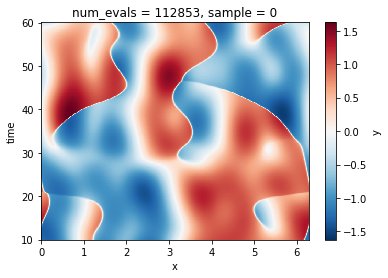

In [14]:
reference.y[0].sel(time=slice(10, 60)).plot.imshow()

Coarse-grained simulation with our neural network:

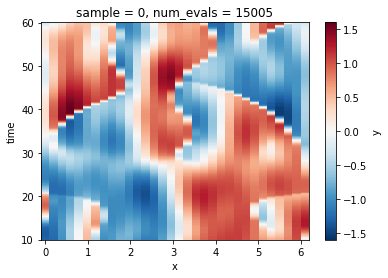

In [25]:
results.y[0].plot.imshow()

Difference between the neural network results and coarse-grained reference results:

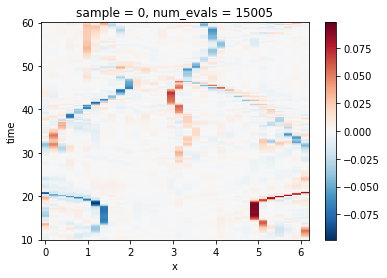

In [34]:
(results.y.sel(sample=0)
 - reference.y.sel(sample=0, time=slice(10, 60)).coarsen(x=16).mean()
   .assign_coords(x=results.x)).plot.imshow()

As you can see, the model does a pretty reasonable job, despite the much coarser grid.